In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

import seaborn as sns

from spring_rods_system_setup import SpringRodsSystemSetup
from spring_rods_system_solver import SpringRodsSystemSolver

from utils.plot_utils import plot_displacements_and_stress

In [2]:
plt.rcParams.update({
    'axes.grid': True,
    'figure.facecolor': 'white',
    'mathtext.default': 'regular'
})

In [3]:
def prepare_body_force(experiment_idx: int, force: float):
    if experiment_idx == 1:
        return lambda x: np.where(x < 0, force, -force)
    if experiment_idx == 2:
        return lambda x: np.where(x < 0, -force, force)
    if experiment_idx == 3:
        return lambda x: np.where(x < 0, force, 0)
    if experiment_idx == 4:
        return lambda x: np.where(x < 0, -force, 0)
    if experiment_idx == 5:
        return lambda x: np.where(x < 0, force, force)

In [4]:
experiment_num = 5

In [5]:
model = SpringRodsSystemSetup(
    interval=(-1, 1),
    spring_len=1,
    step_size=1/16,
    material_const=(1, 1),
    spring_const=(1, 1),
    body_forces=lambda x: 0 # this will be overwritten by experiment setup
)
solver = SpringRodsSystemSolver(model)

In [6]:
forces_discrete = [0, 1, 2]

In [7]:
results = []

for force_param in forces_discrete:
    force_func = prepare_body_force(experiment_num, force_param)
    model.set_body_forces(force_func)

    displacements = solver(model)
    stress = solver.compute_stresses(displacements)
    results.append((displacements, stress))

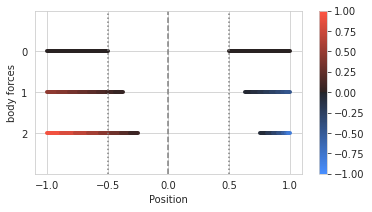

In [8]:
plot_displacements_and_stress(
    model,
    results,
    forces_discrete,
    parameter_name='body forces',
    limits=(-1, 1),
    path=f'plots/force_dependence/experiment{experiment_num}_displ_and_stress.png'
)